In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error, root_mean_squared_error

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
simple_solution = pd.read_csv("sample_solution.csv")
test = pd.read_csv("test_data.csv")
train = pd.read_csv("train_data.csv")
print(simple_solution.shape)
print(test.shape)
print(train.shape)

(5000, 2)
(5000, 11)
(20000, 12)


In [5]:
test.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [6]:
train.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


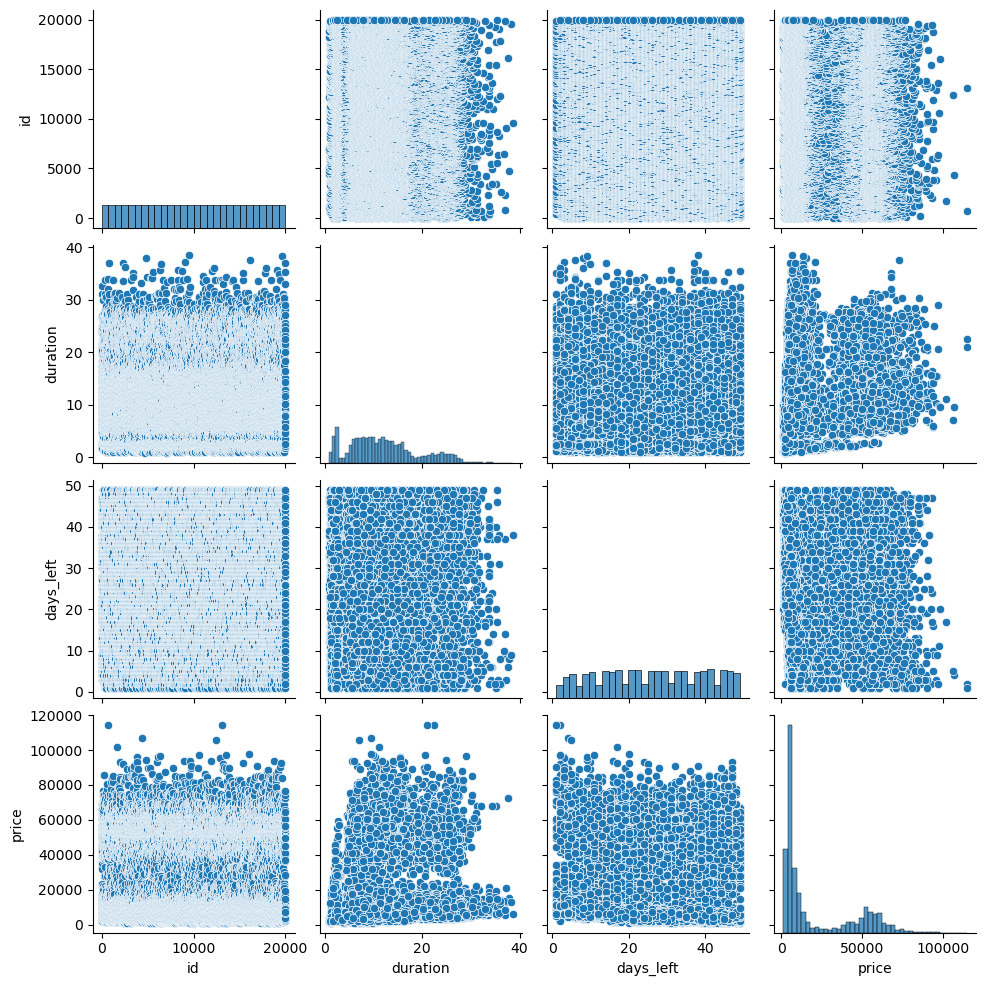

In [7]:
sns.pairplot(train)
plt.show()

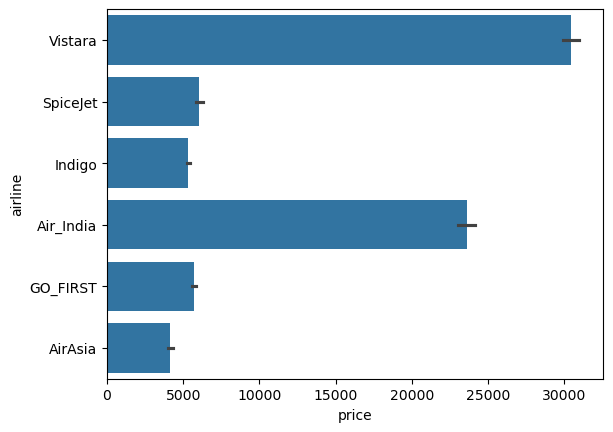

In [8]:
sns.barplot(data=train, x='price', y='airline')
plt.show()

In [9]:
train.isnull().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [11]:
X = train.drop('price', axis=1)
y = train[['price']]

In [12]:
train.stops.value_counts()

stops
one            16666
zero            2440
two_or_more      894
Name: count, dtype: int64

In [13]:
X.head(1)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21


In [14]:
def prepared(df):
    df[['fl_country', 'fl_num']] = df['flight'].str.split("-", expand=True)
    df['fl_num'] = df['fl_num'].astype('int64')
    df.drop(['id', 'flight'], axis=1, inplace=True)
    
    ord_encoder = OrdinalEncoder()
    df[['airline', 'fl_country']] = ord_encoder.fit_transform(df[['airline', 'fl_country']])
    
    hot_encoder = ['source_city', 'departure_time', 'arrival_time', 'destination_city']
    df = pd.get_dummies(df, columns=hot_encoder)
    
    stops = {'zero': 0, 'one': 1, 'two_or_more': 2}
    classes = {'Economy': 0, 'Business': 1}
    df['stops'] = df['stops'].replace(stops)
    df['class'] = df['class'].replace(classes)
    
    std_scaler = StandardScaler()
    df = std_scaler.fit_transform(df)
    
    return df

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000, 11)
(8000, 11)
(12000, 1)
(8000, 1)


In [24]:
X_train = prepared(X_train)
X_train

array([[-0.60950401,  2.69328199, -0.67250059, ..., -0.40737469,
        -0.44089271, -0.49596021],
       [-0.60950401,  0.19680556, -0.67250059, ..., -0.40737469,
        -0.44089271,  2.01629077],
       [ 1.03558104,  0.19680556, -0.67250059, ..., -0.40737469,
        -0.44089271, -0.49596021],
       ...,
       [-1.15786569,  0.19680556, -0.67250059, ..., -0.40737469,
         2.26812549, -0.49596021],
       [-0.60950401,  0.19680556, -0.67250059, ..., -0.40737469,
        -0.44089271, -0.49596021],
       [-0.06114233,  0.19680556, -0.67250059, ..., -0.40737469,
        -0.44089271, -0.49596021]])

In [ ]:
X_test = prepared(X_test)

In [33]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

predict = LR_model.predict(X_test)

MAE = mean_absolute_error(y_test, predict)
RMSE = np.sqrt(root_mean_squared_error(y_test, predict))

print(f"MAE: {MAE}")
print(f"RMSE: {RMSE}")

MAE: 129866775996535.16
RMSE: 12702290.113043044


In [30]:
X_test

array([[-0.60602973,  0.18684428, -0.67616189, ..., -0.40053634,
        -0.45457288, -0.49001817],
       [ 1.02454353,  0.18684428,  1.47893576, ..., -0.40053634,
        -0.45457288, -0.49001817],
       [ 1.02454353,  0.18684428,  1.47893576, ..., -0.40053634,
        -0.45457288, -0.49001817],
       ...,
       [-1.14955414,  0.18684428,  1.47893576, ..., -0.40053634,
         2.19986728, -0.49001817],
       [ 1.02454353,  0.18684428,  1.47893576, ..., -0.40053634,
        -0.45457288, -0.49001817],
       [ 1.02454353,  0.18684428,  1.47893576, ..., -0.40053634,
        -0.45457288, -0.49001817]])

In [35]:
LOG_model = LogisticRegression()
LOG_model.fit(X_train, y_train)

predict1 = LOG_model.predict(X_test)

MAE = mean_absolute_error(y_test, predict)
RMSE = np.sqrt(root_mean_squared_error(y_test, predict))

print(f"MAE: {MAE}")
print(f"RMSE: {RMSE}")

c:\Users\MAGISTR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 129866775996535.16
RMSE: 12702290.113043044


In [36]:
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_train, y_train)

predict = Tree_model.predict(X_test)

MAE = mean_absolute_error(y_test, predict)
RMSE = np.sqrt(root_mean_squared_error(y_test, predict))

print(f"MAE: {MAE}")
print(f"RMSE: {RMSE}")

MAE: 2215.5214375
RMSE: 71.40023034668245


In [50]:
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)

predict = RF_model.predict(X_test)

MAE = mean_absolute_error(y_test, predict)
RMSE = np.sqrt(root_mean_squared_error(y_test, predict))

print(f"MAE: {MAE}")
print(f"RMSE: {RMSE}")

c:\Users\MAGISTR\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE: 1846.5788716666666
RMSE: 61.162232612327294


In [43]:
test = prepared(test)

C:\Users\MAGISTR\AppData\Local\Temp\ipykernel_14412\711024018.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['stops'] = df['stops'].replace(stops)
C:\Users\MAGISTR\AppData\Local\Temp\ipykernel_14412\711024018.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace(classes)


In [44]:
test

array([[-1.12647237,  0.20037687,  1.50810949, ..., -0.40681834,
        -0.44903699, -0.48400738],
       [ 1.05915505,  0.20037687,  1.50810949, ..., -0.40681834,
        -0.44903699,  2.06608419],
       [-1.12647237, -2.38179933,  1.50810949, ..., -0.40681834,
        -0.44903699, -0.48400738],
       ...,
       [-1.12647237,  0.20037687,  1.50810949, ..., -0.40681834,
        -0.44903699,  2.06608419],
       [-1.12647237,  0.20037687,  1.50810949, ...,  2.45809958,
        -0.44903699, -0.48400738],
       [ 1.05915505,  0.20037687,  1.50810949, ..., -0.40681834,
        -0.44903699, -0.48400738]])

In [45]:
prediction = Tree_model.predict(test)

In [46]:
simple_solution.head()

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [47]:
simple_solution['price'] = prediction

In [48]:
simple_solution.head()

,id,price
0,1,54863.0
1,2,70431.0
2,3,24122.0
3,4,5485.0
4,5,6190.0


In [49]:
simple_solution.to_csv("submission.csv", index=False)